In [43]:
import sys
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# From Biological to Artificial Neural Networks with Keras
## The Perceptron

[Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html):1層のTLUからなるネットワーク。

TLU:threshold logic unit


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int32)

per_clf=Perceptron()
per_clf.fit(X,y)

y_pred=per_clf.predict([[2,0.5]])

In [2]:
y_pred

array([0], dtype=int32)

(0.0, 5.0, 0.0, 2.0)

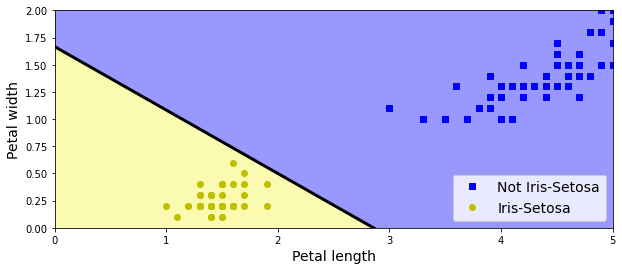

In [45]:
a= -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b= -per_clf.intercept_ / per_clf.coef_[0][1]

axes=[0,5, 0,2]

x0, x1= np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1,1),
    np.linspace(axes[2], axes[3], 200).reshape(-1,1),
)
X_new=np.c_[x0.ravel(), x1.ravel()]
y_predict=per_clf.predict(X_new)
zz= y_predict.reshape(x0.shape)

plt.figure(figsize=(10,4))
plt.plot(X[y==0,0], X[y==0,1], 'bs', label="Not Iris-Setosa")
plt.plot(X[y==1,0], X[y==1,1], 'yo', label="Iris-Setosa")

plt.plot([axes[0], axes[1]],[a *axes[0] +b, a*axes[1]+b], 'k-', linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap=ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0,x1,zz, cmap=custom_cmap)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)

## Activation functions

# Implementing MLPs with Keras

## Installing TensorFlow 2

In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)


2.9.0
2.9.0


## Building an Image Classifier Using the Sequential API

[fashion_mnist](https://keras.io/ja/datasets/#fashion-mnist): 10種類のファッションカテゴリの白黒画像。

In [4]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)=fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


訓練データと検証データに分割

In [6]:
X_valid, X_train=X_train_full[:5000] /255.0, X_train_full[5000:]/255.0
y_valid, y_train=y_train_full[:5000], y_train_full[5000:]
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
             "Sandal", "Shirt","Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

[Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): レイヤーをスタックしたモデル。

[Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten): インプットの平坦化。

[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): densely-connected layer(全結合層）。引数にノード数、活性化層の指定、重みの初期化・正規化などがある。

一層目に`input_shape`引数を書く。もしくは`model.add(keras.Input(shape=(28,28)))`のような書き方もできる。

In [8]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

こういう書き方もできる
```
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])
```

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [12]:
model.get_layer('dense') is hidden1

True

In [13]:
weights, biases=hidden1.get_weights()
weights

array([[-0.03800577, -0.06072519,  0.04525503, ..., -0.04033432,
         0.05997644, -0.02142646],
       [ 0.03907026,  0.03999666, -0.07150029, ...,  0.05328341,
        -0.04518685,  0.04850858],
       [ 0.04501025,  0.02594817, -0.05556693, ..., -0.04995359,
         0.05097643, -0.01770821],
       ...,
       [-0.07217607, -0.00272013,  0.01440709, ..., -0.06088309,
        -0.05158113,  0.00285212],
       [-0.03817282, -0.03467896, -0.05260331, ..., -0.07254871,
        -0.0632885 ,  0.05916578],
       [ 0.02746485, -0.05840463,  0.03913011, ...,  0.02073743,
         0.02145883, -0.03724727]], dtype=float32)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

weightsはランダムに初期化された状態。biasesは0。Dense()の引数で`kernel_initializer`を指定すると異なる初期化法を使える。

In [15]:
print(weights.shape)
print(biases.shape)


(784, 300)
(300,)


### Compiling the model
損失関数やオプティマイザを指定するために`compile`が必要。

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

`sparse_categorical_crossentropy`は排他的な0-9のインデックスを求める今回の問題のような時に使用。  
one-hotベクトルの場合は`categorical_crossentropy`を使う。  
2値分類なら`binary_crossentropy`。その場合最終層の活性化は`sigmoid`にする。

`optimizer='sgd'`は学習率が0.01固定なので、文字列指定よりも`optimizer=keras.optimizers.SGD(lr=???)`とするのが一般的。

### Training and evaluating the model

訓練データだけでなく検証データも一緒に渡している（これはオプション）。エポックごとにlossとmetrics(ここではaccuracy)を測れる。

In [17]:
history=model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7308 - accuracy: 0.7598 - val_loss: 0.4981 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 2s 961us/step - loss: 0.4856 - accuracy: 0.8311 - val_loss: 0.4491 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 2s 957us/step - loss: 0.4396 - accuracy: 0.8452 - val_loss: 0.4269 - val_accuracy: 0.8526
Epoch 4/30
1719/1719 [==============================] - 2s 931us/step - loss: 0.4141 - accuracy: 0.8544 - val_loss: 0.4054 - val_accuracy: 0.8612
Epoch 5/30
1719/1719 [==============================] - 2s 955us/step - loss: 0.3939 - accuracy: 0.8620 - val_loss: 0.3937 - val_accuracy: 0.8668
Epoch 6/30
1719/1719 [==============================] - 2s 954us/step - loss: 0.3791 - accuracy: 0.8662 - val_loss: 0.3706 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 2s 961us/step - loss: 0.3648 - accuracy: 0.8705 - val_loss: 0.3713 - v

fitの出力であるHistoryをプロットする。

Historyは以下の要素を含む。
- params: トレーニングパラメータ
- epoch: epochのリスト
- history: epochごとのlossとmetrics

(0.0, 1.0)

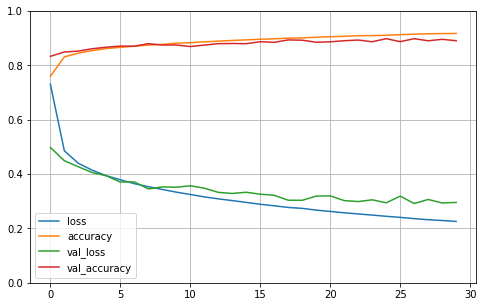

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

テストデータに対するエラーを見積もる。

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 771us/step - loss: 57.7798 - accuracy: 0.8566


[57.77980041503906, 0.8565999865531921]

### Using the model to make predictions

テストデータの一部を使って予測を試す。

In [20]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 46ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

one-hotベクトルのようになっているが、実際は各クラスの確率が出ている。  
`np.argmax`で最大のインデックスを取得する。

In [21]:
#y_pred=model.predict_classes(X_new) # deprecated
y_pred=np.argmax(y_proba, axis=-1) 
y_pred

array([9, 2, 1])

In [22]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [23]:
y_new= y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

回帰問題としてカリフォルニア住宅価格を扱う。

[California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset): 1990のUSセンサス。

X: 8属性
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

y: 住宅価格の中央値、単位$100,000

In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid=train_test_split(X_train_full, y_train_full)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [25]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [26]:
print(X_train.shape)
print(housing.feature_names)
print(y_train[:3])

(11610, 8)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[1.341 1.596 2.25 ]


分類器と同様にSequential APIを用いる。

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [28]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7714 - val_loss: 10.1615
Epoch 2/20
363/363 [==============================] - 0s 956us/step - loss: 1.0303 - val_loss: 3.0817
Epoch 3/20
363/363 [==============================] - 0s 960us/step - loss: 0.5494 - val_loss: 0.4056
Epoch 4/20
363/363 [==============================] - 0s 966us/step - loss: 0.4066 - val_loss: 0.3793
Epoch 5/20
363/363 [==============================] - 0s 964us/step - loss: 0.3936 - val_loss: 0.3776
Epoch 6/20
363/363 [==============================] - 0s 979us/step - loss: 0.3846 - val_loss: 0.3611
Epoch 7/20
363/363 [==============================] - 0s 981us/step - loss: 0.3804 - val_loss: 0.3546
Epoch 8/20
363/363 [==============================] - 0s 946us/step - loss: 0.3755 - val_loss: 0.3626
Epoch 9/20
363/363 [==============================] - 0s 948us/step - loss: 0.3705 - val_loss: 0.3546
Epoch 10/20
363/363 [==============================] - 0s 938us/step - loss: 0.3693

In [29]:
mse_test=model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 609us/step - loss: 0.3846


In [30]:
X_new=X_test[:3]
y_pred=model.predict(X_new)

1/1 [==============================] - 0s 24ms/step


In [31]:
mse_test

0.3845856487751007

In [32]:
print(y_pred)
print(y_test[:3])

[[0.9691032]
 [2.848493 ]
 [2.7095976]]
[0.894 1.375 2.952]


## Building Complex Models Using the Functional API

より複雑なネットワークを構築するにはFunctional APIを用いる。

前層を関数の引数のように与えているのがFuctionalの所以。この時点ではデータは処理しておらず接続を指定しているだけ。

[Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input)

[Concatenate](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Concatenate): 使い方が違うだけで[concatenate](https://www.tensorflow.org/api_docs/python/tf/keras/layers/concatenate)と同じ。

[Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

concatの部分で入力と2層の隠れ層出力を結合している(concatなので足すのではなく繋いでいる)。

In [33]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation="relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [34]:
# SGDのlrを1e-3にすると計算が安定
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test=model.evaluate(X_test,y_test)
y_pred=model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8757 - val_loss: 0.8398
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7515 - val_loss: 0.7291
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6691 - val_loss: 0.6706
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6197 - val_loss: 0.6282
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5828 - val_loss: 0.5963
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5549 - val_loss: 0.5717
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5333 - val_loss: 0.5512
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5151 - val_loss: 0.5362
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4999 - val_loss: 0.5216
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4878 - val_loss: 0.5095

In [35]:
mse_test

0.43570390343666077

In [36]:
y_pred

array([[1.1152503],
       [1.1895642],
       [3.3124235]], dtype=float32)

インプットが２つの場合を考える。

カリフォルニアデータセットのうち、 インデックス0-4の特徴量（５つ）をinput_A、2-７の特徴量（６つ）をinput_Bとする。input_Bは2層MLPを通しinput_Aと結合する。

In [35]:
input_A=keras.layers.Input(shape=[5], name="wide_input")
input_B=keras.layers.Input(shape=[6], name="deep_input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1, name = "output")(concat)
model=keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                            

In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

データをモデルに合わせて次のように分離。

In [41]:
X_train_A, X_train_B = X_train[:,:5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:,:5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:,:5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [40]:
history=model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test=model.evaluate((X_test_A,X_test_B),y_test)
y_pred=model.predict((X_new_A,X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.7151 - val_loss: 0.8653
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7898 - val_loss: 0.7672
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7182 - val_loss: 0.7153
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6739 - val_loss: 0.6789
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6395 - val_loss: 0.6464
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6105 - val_loss: 0.6210
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5853 - val_loss: 0.5995
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5636 - val_loss: 0.5782
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5441 - val_loss: 0.5600
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5277 - val_loss: 0.5459

アウトプットが２つの場合。

In [37]:
input_A=keras.layers.Input(shape=[5], name="wide_input")
input_B=keras.layers.Input(shape=[6], name="deep_input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A,hidden2])
output=keras.layers.Dense(1, name = "main_output")(concat)
aux_output=keras.layers.Dense(1, name = "aux_output")(hidden2)
model=keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [38]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           930         ['dense_10[0][0]']               
                                                                                            

アウトプットごとに損失関数が必要。コンパイル時にlossのリストを渡す（１つしか渡さなかった場合全てのアウトプットに対して同じ損失を用いることになる）。デフォルトではそれぞれのlossを計算し和をとる。それぞれに重みを持たせることができるのでmain_outputにより大きな重みづけをする。

In [42]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

訓練時にはアウトプットごとにラベルが必要だが、ここでは同じラベルをタプルで与える。実用上は何を学習させたいかによる。

In [43]:
history=model.fit((X_train_A, X_train_B), [y_train, y_train], epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6884 - main_output_loss: 2.3355 - aux_output_loss: 5.8648 - val_loss: 1.4544 - val_main_output_loss: 1.0946 - val_aux_output_loss: 4.6928
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2771 - main_output_loss: 1.0018 - aux_output_loss: 3.7545 - val_loss: 1.0467 - val_main_output_loss: 0.8322 - val_aux_output_loss: 2.9775
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9297 - main_output_loss: 0.7515 - aux_output_loss: 2.5338 - val_loss: 0.8755 - val_main_output_loss: 0.7354 - val_aux_output_loss: 2.1365
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8086 - main_output_loss: 0.6811 - aux_output_loss: 1.9560 - val_loss: 0.7863 - val_main_output_loss: 0.6815 - val_aux_output_loss: 1.7295
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7399 - main_output_loss: 0.6374 - aux_output_loss: 1.6628 - val_loss

In [44]:
total_loss, main_loss, aux_loss=model.evaluate((X_test_A,X_test_B),(y_test,y_test))

162/162 [==============================] - 0s 882us/step - loss: 0.5073 - main_output_loss: 0.4526 - aux_output_loss: 0.9992


In [45]:
y_pred_main, y_pred_aux=model.predict((X_new_A,X_new_B))

1/1 [==============================] - 0s 33ms/step


In [46]:
print(y_pred_main)
print(y_pred_aux)


[[1.381964  ]
 [0.89944094]
 [3.301559  ]]
[[1.6999665]
 [1.5514565]
 [1.9337424]]


## Using the Subclassing API to Build Dynamic Models

こういう時にSubclassing APIを用いる。
- ダイナミックな振る舞い: loops, varying shapes, conditional branch
- imperative（命令型） programming (<==>declarative:宣言型)

コンストラクタに必要な層を記述し、`call`メソッドにネットワークを書く。

In [39]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat= keras.layers.concatenate([input_A, hidden2])
        main_output=self.main_output(concat)
        aux_output=self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation='relu')


In [42]:
model.compile(loss='mse', loss_weights=[0.9,0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history=model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                  validation_data=((X_valid_A, X_valid_B),(y_valid, y_valid)))
total_loss, main_loss, aux_loss= model.evaluate((X_test_A, X_test_B),(y_test, y_test))
y_pred_main, y_pred_aux= model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.8622 - output_1_loss: 2.7261 - output_2_loss: 4.0875 - val_loss: 1.7130 - val_output_1_loss: 1.5640 - val_output_2_loss: 3.0534
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0804 - output_1_loss: 0.9221 - output_2_loss: 2.5049 - val_loss: 0.9339 - val_output_1_loss: 0.7941 - val_output_2_loss: 2.1919
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8478 - output_1_loss: 0.7316 - output_2_loss: 1.8934 - val_loss: 0.7892 - val_output_1_loss: 0.6755 - val_output_2_loss: 1.8122
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7559 - output_1_loss: 0.6633 - output_2_loss: 1.5892 - val_loss: 0.7280 - val_output_1_loss: 0.6281 - val_output_2_loss: 1.6276
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.7045 - output_1_loss: 0.6237 - output_2_loss: 1.4311 - val_loss: 0.6855 - val_output_1_loss: 0.5938 - val_ou

## Saving and Restoring a Model

動作確認のため簡単なモデルを作成。

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [53]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3774 - val_loss: 0.5655
Epoch 2/20
363/363 [==============================] - 0s 971us/step - loss: 0.4676 - val_loss: 0.4645
Epoch 3/20
363/363 [==============================] - 0s 964us/step - loss: 0.4225 - val_loss: 0.4441
Epoch 4/20
363/363 [==============================] - 0s 964us/step - loss: 0.4090 - val_loss: 0.4291
Epoch 5/20
363/363 [==============================] - 0s 958us/step - loss: 0.3993 - val_loss: 0.4211
Epoch 6/20
363/363 [==============================] - 0s 963us/step - loss: 0.3918 - val_loss: 0.4217
Epoch 7/20
363/363 [==============================] - 0s 966us/step - loss: 0.3891 - val_loss: 0.4119
Epoch 8/20
363/363 [==============================] - 0s 979us/step - loss: 0.3849 - val_loss: 0.4064
Epoch 9/20
363/363 [==============================] - 0s 985us/step - loss: 0.3795 - val_loss: 0.4052
Epoch 10/20
363/363 [==============================] - 0s 964us/step - loss: 0.3786 

In [54]:
model.save("my_keras_model.h5")

In [48]:
model = keras.models.load_model("my_keras_model.h5")

In [56]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 657us/step - loss: 0.3954


0.3953877389431

## Using Callbacks

In [57]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history=model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 0s 807us/step - loss: 0.3535
Epoch 2/10
363/363 [==============================] - 0s 802us/step - loss: 0.3554
Epoch 3/10
363/363 [==============================] - 0s 791us/step - loss: 0.3501
Epoch 4/10
363/363 [==============================] - 0s 793us/step - loss: 0.3495
Epoch 5/10
363/363 [==============================] - 0s 792us/step - loss: 0.3476
Epoch 6/10
363/363 [==============================] - 0s 792us/step - loss: 0.3495
Epoch 7/10
363/363 [==============================] - 0s 798us/step - loss: 0.3461
Epoch 8/10
363/363 [==============================] - 0s 788us/step - loss: 0.3470
Epoch 9/10
363/363 [==============================] - 0s 784us/step - loss: 0.3490
Epoch 10/10
363/363 [==============================] - 0s 790us/step - loss: 0.3412


検証データを使っている場合は`save_best_only`で最も性能の良かったモデルのみ保存できる。
保存したモデルをリストアすると、性能の良かったエポックのモデルを再現できる。

これはアーリーストッピングとして使うことができる。

In [58]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history=model.fit(X_train, y_train, epochs=10, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb])
# roll back to best model
model = keras.models.load_model("my_keras_model.h5")


Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3435 - val_loss: 0.3990
Epoch 2/10
363/363 [==============================] - 0s 992us/step - loss: 0.3406 - val_loss: 0.3628
Epoch 3/10
363/363 [==============================] - 0s 983us/step - loss: 0.3444 - val_loss: 0.3660
Epoch 4/10
363/363 [==============================] - 0s 992us/step - loss: 0.3363 - val_loss: 0.3657
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3420 - val_loss: 0.3607
Epoch 6/10
363/363 [==============================] - 0s 985us/step - loss: 0.3417 - val_loss: 0.3604
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3340 - val_loss: 0.3550
Epoch 8/10
363/363 [==============================] - 0s 987us/step - loss: 0.3421 - val_loss: 0.3575
Epoch 9/10
363/363 [==============================] - 0s 997us/step - loss: 0.3316 - val_loss: 0.3641
Epoch 10/10
363/363 [==============================] - 0s 987us/step - loss: 0.3344 - va

EarlyStopping専用のコールバックも準備されている。

[EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)：検証データの改善がなくなったら訓練を終了する。

チェックポイントの保存と組み合わせて使用することもできる。

In [62]:
print(early_stopping_cb)

In [60]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history=model.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3415 - val_loss: 0.3568
Epoch 2/100
363/363 [==============================] - 0s 992us/step - loss: 0.3336 - val_loss: 0.3592
Epoch 3/100
363/363 [==============================] - 0s 990us/step - loss: 0.3309 - val_loss: 0.3632
Epoch 4/100
363/363 [==============================] - 0s 992us/step - loss: 0.3318 - val_loss: 0.3577
Epoch 5/100
363/363 [==============================] - 0s 977us/step - loss: 0.3340 - val_loss: 0.3599
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3288 - val_loss: 0.3621
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3295 - val_loss: 0.3519
Epoch 8/100
363/363 [==============================] - 0s 985us/step - loss: 0.3269 - val_loss: 0.3525
Epoch 9/100
363/363 [==============================] - 0s 991us/step - loss: 0.3253 - val_loss: 0.3553
Epoch 10/100
363/363 [==============================] - 0s 979us/step - loss: 0

カスタムコールバック。

[Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback)

訓練中の検証損失と訓練損失の比を表示する。

In [64]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"]/logs["loss"]))

In [65]:
custom_cb= PrintValTrainRatioCallback()
history=model.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid),
                  callbacks=[custom_cb, early_stopping_cb])

Epoch 1/100
328/363 [==========================>...] - ETA: 0s - loss: 0.3139
val/train: 1.09
363/363 [==============================] - 0s 1ms/step - loss: 0.3108 - val_loss: 0.3388
Epoch 2/100
319/363 [=========================>....] - ETA: 0s - loss: 0.3122
val/train: 1.59
363/363 [==============================] - 0s 1ms/step - loss: 0.3087 - val_loss: 0.4896
Epoch 3/100
324/363 [=========================>....] - ETA: 0s - loss: 0.3150
val/train: 1.07
363/363 [==============================] - 0s 995us/step - loss: 0.3154 - val_loss: 0.3389
Epoch 4/100
330/363 [==========================>...] - ETA: 0s - loss: 0.3100
val/train: 1.10
363/363 [==============================] - 0s 976us/step - loss: 0.3087 - val_loss: 0.3403
Epoch 5/100
320/363 [=========================>....] - ETA: 0s - loss: 0.3110
val/train: 1.09
363/363 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3388
Epoch 6/100
321/363 [=========================>....] - ETA: 0s - loss: 0.3033
val

## Using TensorBoard for Visualization

In [46]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id=time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir=get_run_logdir()

In [49]:
tensorboard_cb=keras.callbacks.TensorBoard(run_logdir)
history=model.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3180 - val_loss: 0.3015
Epoch 2/30
363/363 [==============================] - 0s 960us/step - loss: 0.3177 - val_loss: 0.2932
Epoch 3/30
363/363 [==============================] - 0s 955us/step - loss: 0.3168 - val_loss: 0.2976
Epoch 4/30
363/363 [==============================] - 0s 979us/step - loss: 0.3153 - val_loss: 0.3020
Epoch 5/30
363/363 [==============================] - 0s 971us/step - loss: 0.3137 - val_loss: 0.2975
Epoch 6/30
363/363 [==============================] - 0s 969us/step - loss: 0.3138 - val_loss: 0.2970
Epoch 7/30
363/363 [==============================] - 0s 948us/step - loss: 0.3128 - val_loss: 0.3027
Epoch 8/30
363/363 [==============================] - 0s 955us/step - loss: 0.3126 - val_loss: 0.2939
Epoch 9/30
363/363 [==============================] - 0s 942us/step - loss: 0.3158 - val_loss: 0.3050
Epoch 10/30
363/363 [==============================] - 0s 954us/step - loss: 0.3129 

In [50]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [26]:
%tensorboard --logdir=./my_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.


In [72]:
test_logdir=get_run_logdir()
writer=tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scaler', np.sin(step/10), step = step)
        data=(np.random.randn(100)+2) * step/100
        tf.summary.histogram('my_hist', data, buckets =50, step = step)
        images=np.random.rand(2,32,32,3)
        tf.summary.image('my_images', images * step / 1000, step = step)
        texts=["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text('my_text', texts, step = step)
        sine_wave=tf.math.sin(tf.range(12000)/48000 *2*np.pi*step)
        audio=tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1,1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)

# Fine-Tuning Neural Network Hyperparameters
ハイパーパラメータ探索のためにsklearnのGridSearchやRandomizedSearchを使いたい。そのような場合、Kerasのモデルをラップしてsklearnのモデルとして扱えるようにする。

まずKerasのモデルを作りコンパイルする関数を作る。引数にハイパーパラメータを与える。

In [8]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

ラッパークラス。

[KerasRegressor](https://keras.io/ja/scikit-learn-api/):sklearnのregressorインターフェースを実装。

ただこれを使うとDeprecationWarningが出て代わりに[Sci-Keras](https://github.com/adriangb/scikeras)を使うよう促される。[移行のための資料](https://www.adriangb.com/scikeras/stable/migration.html)。


In [10]:
keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_1674/1371180924.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [21]:
from scikeras.wrappers import KerasRegressor
keras_reg=KerasRegressor(build_model)

表面的にはsklearnのモデルとして振る舞うが内部はkerasのモデルになっている。kwargs経由で引数が渡されているっぽい。

In [23]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test=keras_reg.score(X_test, y_test)
print(mse_test)
y_pred=keras_reg.predict(X_new)
print(y_pred)

Epoch 1/100
  1/363 [..............................] - ETA: 53s - loss: 11.0541

/home/tuffy/venvs/.tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.3768 - val_loss: 0.7167
Epoch 2/100
363/363 [==============================] - 0s 992us/step - loss: 0.7990 - val_loss: 0.8212
Epoch 3/100
363/363 [==============================] - 0s 985us/step - loss: 0.8758 - val_loss: 0.5496
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5512 - val_loss: 0.4930
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5046 - val_loss: 0.4774
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4886 - val_loss: 0.4684
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4775 - val_loss: 0.4599
Epoch 8/100
363/363 [==============================] - 0s 994us/step - loss: 0.4688 - val_loss: 0.4501
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4614 - val_loss: 0.4451
Epoch 10/100
363/363 [==============================] - 0s 993us/step - loss: 0.4552 - val_loss: 

ランダムサーチ。ランダムサーチはK-fold交差検証なので検証データはここでは使わずEarlyStoppingのみで使っている。

[reciprocal](https://pageperso.lis-lab.fr/~francois.denis/IAAM1/scipy-html-1.0.0/generated/scipy.stats.reciprocal.html): reciprocal=逆数。逆数分布とか対数一様分布とか呼ばれる。[loguniform](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.loguniform.html#scipy.stats.loguniform)が新しいdocだとヒットする。pdfは
$$
f(x,a,b)=\frac{1}{x \log(b/a)}
$$

$a<x<b$、aとbを与えて乱数を生成している。

In [14]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs={
    'n_hidden': [0,1,2,3],
    'n_neurons': np.arange(1,100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv=RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 4.8513 - val_loss: 2.5415
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.8818 - val_loss: 1.2637
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0535 - val_loss: 0.8349
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7738 - val_loss: 0.6798
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6703 - val_loss: 0.6210
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6291 - val_loss: 0.5963
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6099 - val_loss: 0.5837
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5993 - val_loss: 0.5761
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5921 - val_loss: 0.5705
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5865 - val_lo

/home/tuffy/venvs/.tf/lib/python3.10/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [-5.85485895e-01 -3.46677909e-01 -3.57387841e-01             nan
 -4.27793692e-01             nan -3.73092771e-01 -6.98091305e+20
 -4.60249235e-01 -4.11295513e-01]
  warnings.warn(


363/363 [==============================] - 1s 1ms/step - loss: 1.2644 - val_loss: 4.6440
Epoch 2/100
363/363 [==============================] - 0s 992us/step - loss: 9.0837 - val_loss: 0.5868
Epoch 3/100
363/363 [==============================] - 0s 988us/step - loss: 0.8366 - val_loss: 0.5429
Epoch 4/100
363/363 [==============================] - 0s 994us/step - loss: 0.6175 - val_loss: 0.4787
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5165 - val_loss: 0.4552
Epoch 6/100
363/363 [==============================] - 0s 996us/step - loss: 0.4780 - val_loss: 0.4353
Epoch 7/100
363/363 [==============================] - 0s 990us/step - loss: 0.4553 - val_loss: 0.4337
Epoch 8/100
363/363 [==============================] - 0s 987us/step - loss: 0.4407 - val_loss: 0.4198
Epoch 9/100
363/363 [==============================] - 0s 986us/step - loss: 0.4304 - val_loss: 0.4139
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4238 - val_

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe705054700>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fe6dc319300>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [15]:
rnd_search_cv.best_params_

{'learning_rate': 0.004451635554021628, 'n_hidden': 1, 'n_neurons': 47}

In [16]:
rnd_search_cv.best_score_

-0.3466779092947642

In [17]:
model=rnd_search_cv.best_estimator_.model

本で紹介されているハイパーパラメータチューニング用ライブラリ

[Hyperopt](https://github.com/hyperopt/hyperopt): popular。

[Hyperas](https://github.com/maxpumperla/hyperas), [kopt](https://github.com/Avsecz/kopt), [Talos](https://github.com/autonomio/talos):　dKerasモデルの最適化。有用。

[Keras Tuner](https://keras.io/keras_tuner/): GoogleのKeras専用ライブラリ、使い勝手良。

[Scikit-Optimize](https://scikit-optimize.github.io/stable/): 汎用。ベイズ最適化。

[Spearmint](https://github.com/JasperSnoek/spearmint): ベイズ最適化。

[Hyperband](https://github.com/zygmuntz/hyperband): 高速。Lisha Li et al.

[Sklearn-Deap](https://github.com/rsteca/sklearn-deap): 進化計算。
